## Audio and Digital signal processing [DSP]

-Deepanshi Shokeen

**Frequency**: No. of times a sine wave repeats a second. Using frequency of 1KHz

**Amplitude**: in physics, the maximum displacement or distance moved by a point on a vibrating body or wave measured from its equilibrium position. It is equal to one-half the length of the vibration path.

In [1]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt
 
# Frequency is the number of times a wave repeats a second
frequency = 1000
num_samples = 48000
 
# The sampling rate of the analog to digital convert
sampling_rate = 48000.0

# Wave files are usually 16 bits or 2 bytes per sample
# For 16 bits : 2^15-1 =32767
# if we want full scale audio, we'd multiply it with 32767

# Taking audio signal that is half as loud as full scale
amplitude = 16000
 
file = "test.wav"

**Sinewave formula = Amplitude * sin (2pi * frequency * sample)**

or

**Sinewave formula = Amplitude * sin (2pi * frequency * time)**



In [2]:
# Sampling rate or sampling frequency defines the number of samples per second (or per Hz) taken from a continuous signal to make a discrete or digital signal.
# For time-domain signals like the waveforms for sound (and other audio-visual content types), frequencies are measured in in hertz (Hz) or cycles per second. 
sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]

In [3]:
# No.of frames or samples
nframes=num_samples
 
# Data isn't compressed
comptype="NONE"
compname="not compressed"

# No. of channels
nchannels=1
 
# Sample width in bytes i.e is 2 bytes     
sampwidth=2

In [4]:
wav_file=wave.open(file, 'w')
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

Struct is a Python library that takes our data and packs it as binary data h in the code means 16 bit number.

In [5]:
# Example 
np.sin(1)*16000
struct.pack('h', int(np.sin(1)*16000))


b'\x974'

In [6]:
np.sin(1)*16000

13463.535756926343

In [7]:
for s in sine_wave:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))

Using Fourier Transform to convert signal to frequency.
Discrete FT is slow, so I'll be using FAST FT [FFT]

In [8]:
frame_rate = 48000.0
infile = "test.wav"
num_samples = 48000 
wav_file = wave.open(infile, 'r')

# The wave readframes() function reads all the audio frames from a wave file
data = wav_file.readframes(num_samples)
wav_file.close()

In [9]:
# Earlier I had to pack the data to make it readable in binary format. I do the opposite now. 
# The first parameter to the function is a format string, which is the same thing you use when you do a print(). 
# I am telling the unpacker to unpack num_samples 16 bit words (h means 16 bits).

data = struct.unpack('{n}h'.format(n=num_samples), data)

# Convert the data to a numpy array
data = np.array(data)

In [10]:
data.shape

(48000,)

In [11]:
data_fft = np.fft.fft(data)

#data_fft.shape
#(48000,)

In [12]:
# The fft returns an array of complex numbers that doesn’t tell anything. 
# Printing out 5th value of the fft for example:
data_fft[5]

(2.626083341224193+3.5873364189715766j)

In [13]:
# Converting complex numbers to real
frequencies = np.abs(data_fft)

In [14]:
frequencies[5]

4.445817843539593

Now data_fft[1] will contain frequency part of 1 Hz
data_fft[2] will contain frequency part of 2 Hz
data_fft[1000] will contain frequency part of 1000 Hz

In [15]:
data_fft = np.fft.fft(sine_wave)
#abs(data_fft[0])
#abs(data_fft[1])
abs(data_fft[1000])

24000.0

In [16]:
frequencies[1000]

383987426.144328

In [17]:
#np.argmax will return the highest frequency in our signal
print("The frequency is {} Hz".format(np.argmax(frequencies)))

The frequency is 1000 Hz


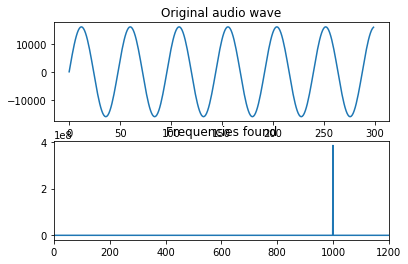

In [18]:
plt.subplot(2,1,1)
plt.plot(data[:300])
plt.title("Original audio wave")
plt.subplot(2,1,2)
plt.plot(frequencies)
plt.title("Frequencies found") 
plt.xlim(0,1200)
plt.show()

## Cleaning a noisy sine wave

In the following example I'll generate a sine wave, add noise to it, add code then to filter the noise

In [19]:
# frequency is the number of times a wave repeats a second
frequency = 1000
noisy_freq = 50
num_samples = 48000
 
# The sampling rate of the analog to digital convert
sampling_rate = 48000.0

The main frequency is a 1000Hz, and we will add a noise of 50Hz to it.

In [20]:
#generate two sine waves, one for the signal and one for the noise, and convert them to numpy arrays.    

#Create the sine wave and noise
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
sine_wave = np.array(sine_wave)
sine_noise = np.array(sine_noise)

# Add them to create a noisy signal
combined_signal = sine_wave + sine_noise

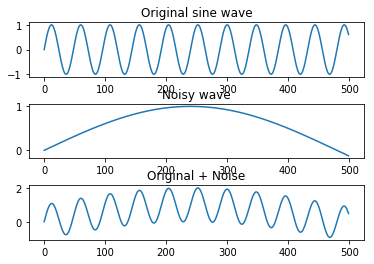

In [21]:
plt.subplot(3,1,1)
plt.title("Original sine wave")
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(sine_noise[:500])
plt.subplot(3,1,3)
plt.title("Original + Noise")
plt.plot(combined_signal[:500])
plt.show()


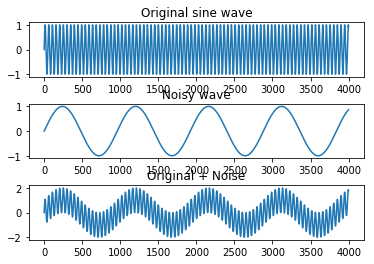

In [22]:
plt.subplot(3,1,1)
plt.title("Original sine wave")
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:4000])#500
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(sine_noise[:4000])
plt.subplot(3,1,3)
plt.title("Original + Noise")
plt.plot(combined_signal[:4000])#3000
plt.show()

In [23]:
data_fft = np.fft.fft(combined_signal)
freq = (np.abs(data_fft[:len(data_fft)]))

(0, 1200)

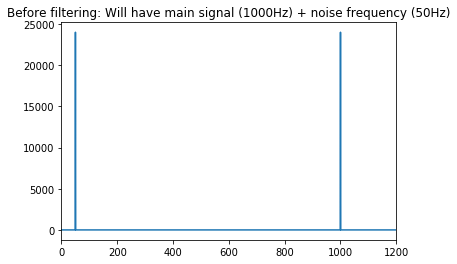

In [24]:
plt.plot(freq)
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
plt.xlim(0,1200)

In [25]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]

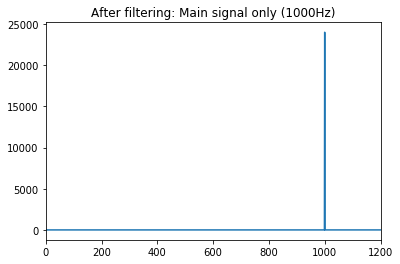

In [26]:
plt.plot(filtered_freq)
plt.title("After filtering: Main signal only (1000Hz)")
plt.xlim(0,1200)
plt.show()
plt.close()

IFFT which stands for Inverse FFT. This will take our signal and convert it back to time domain. 
The final result will be equivalent to convolution of the signals in time domain.    

In [27]:
recovered_signal = np.fft.ifft(filtered_freq)

/Users/deepanshishokeen/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


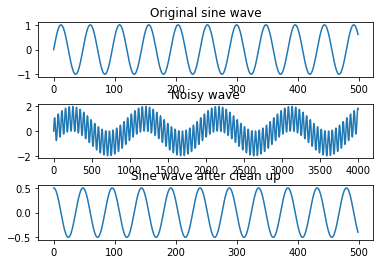

In [28]:
plt.subplot(3,1,1)
plt.title("Original sine wave")
plt.subplots_adjust(hspace=.5) 
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(combined_signal[:4000])
plt.subplot(3,1,3)
plt.title("Sine wave after clean up")
plt.plot((recovered_signal[:500]))
plt.show()

/Users/deepanshishokeen/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


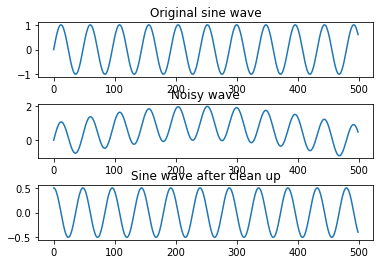

In [29]:
plt.subplot(3,1,1)
plt.title("Original sine wave")
plt.subplots_adjust(hspace=.5) 
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(combined_signal[:500])
plt.subplot(3,1,3)
plt.title("Sine wave after clean up")
plt.plot((recovered_signal[:500]))
plt.show()